<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/GAM_optim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pygam
!pip install pytimetk

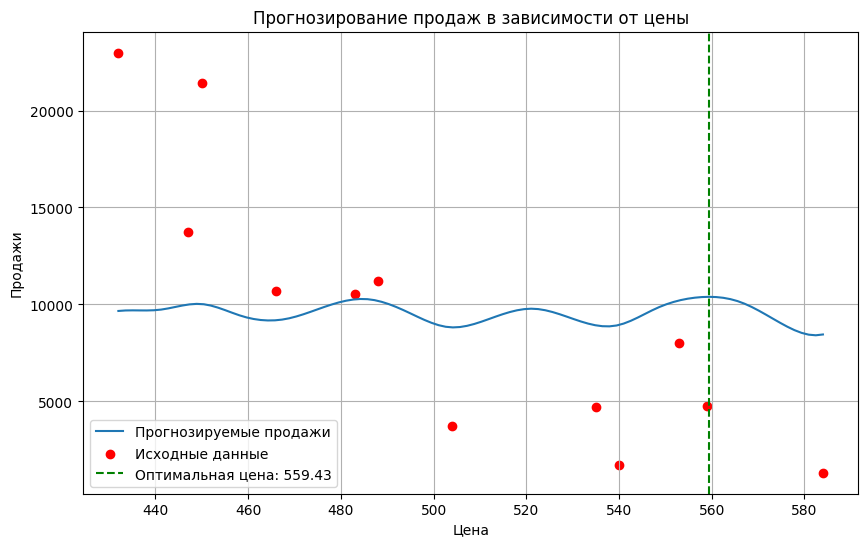

(559.4343434343434, 10393.723805263187)

In [2]:
import numpy as np
from pygam import LinearGAM, s
import matplotlib.pyplot as plt

# Данные
prices = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553])
sales = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994])

# Обучение модели
gam = LinearGAM(s(0)).fit(prices, sales)

# Прогнозирование на следующем месяце для различных цен
price_range = np.linspace(min(prices), max(prices), 100)
sales_pred = gam.predict(price_range)

# Поиск цены, при которой продажи максимальны
optimal_price = price_range[np.argmax(sales_pred)]
optimal_sales = max(sales_pred)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(price_range, sales_pred, label='Прогнозируемые продажи')
plt.scatter(prices, sales, color='red', label='Исходные данные')
plt.axvline(optimal_price, color='green', linestyle='--', label=f'Оптимальная цена: {optimal_price:.2f}')
plt.xlabel('Цена')
plt.ylabel('Продажи')
plt.title('Прогнозирование продаж в зависимости от цены')
plt.legend()
plt.grid(True)
plt.show()

# Вывод оптимальной цены и объема продаж
optimal_price, optimal_sales


In [28]:
# Данные
import pandas as pd
from pygam import s,ExpectileGAM
from scipy.interpolate import interp1d

prices = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553])
sales = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994])

# # Исходные данные
# prices = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553])
# sales = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994])

# # Создаем интерполяционные функции
# f_prices = interp1d(np.linspace(0, 1, len(prices)), prices, kind='cubic')
# f_sales = interp1d(np.linspace(0, 1, len(sales)), sales, kind='cubic')

# # Генерируем 1000 значений
# x_new = np.linspace(0, 1, 1000)
# prices_new = f_prices(x_new)
# sales_new = f_sales(x_new)

X = pd.DataFrame({'Price':prices})
y = pd.DataFrame({'Sales':sales})

In [29]:
quantiles = [0.25,0.5,0.975]
gam_res = {}
for q in quantiles:
  gam  = ExpectileGAM(s(0),expectile=q)
  gam.fit(X,y)
  gam_res[q]=gam
gam_res


{0.25: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.25, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.5: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.5, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.975: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.975, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False)}

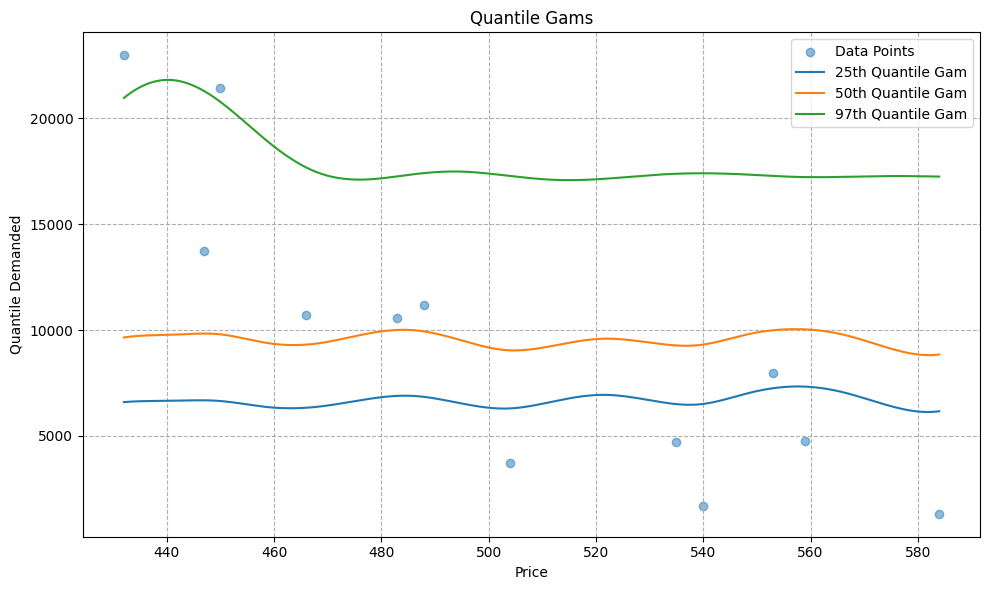

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,alpha=0.5,label='Data Points')
XX = np.linspace(X.min(),X.max(),1000).reshape(-1,1)
for q,gam in gam_res.items():
   plt.plot(XX,gam.predict(XX),label=f'{int(q*100)}th Quantile Gam')

plt.xlabel('Price')
plt.ylabel('Quantile Demanded')
plt.title('Quantile Gams')
plt.grid(True,which='both',linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
gam_res

{0.25: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.25, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.5: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.5, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.975: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.975, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False)}

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     28.56
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           0.000326
Time:                        15:21:34   Log-Likelihood:                -114.83
No. Observations:                  12   AIC:                             233.7
Df Residuals:                      10   BIC:                             234.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.108e+04   1.16e+04      6.148      0.0

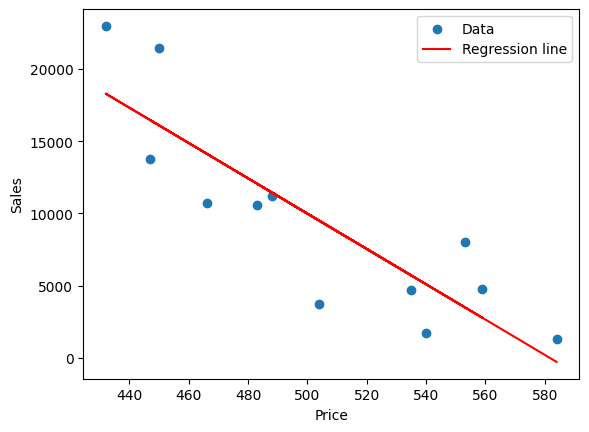

In [31]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Исходные данные
prices = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553])
sales = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994])

# Создаем DataFrame
X = pd.DataFrame({'Price': prices})
y = pd.DataFrame({'Sales': sales})

# Добавляем константу для свободного члена
X = sm.add_constant(X)

# Создаем модель линейной регрессии
model = sm.OLS(y, X)

# Обучаем модель
results = model.fit()

# Выводим результаты
print(results.summary())

# Предсказываем значения
y_pred = results.predict(X)

# Строим график
plt.scatter(X['Price'], y, label='Data')
plt.plot(X['Price'], y_pred, color='red', label='Regression line')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [3]:
import pandas as pd
from pygam import s,ExpectileGAM
from scipy.interpolate import interp1d
import plotly.express as px
import pytimetk as tk
import textwrap
import numpy as np


# Исходные данные
prices = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553])
sales = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994])

# Создаем DataFrame
data = pd.DataFrame({'Price': prices, 'Sales': sales})

# Создаем scatter plot с линией LOWESS
fig = px.scatter(data, x='Price', y='Sales', trendline='lowess')

# Показываем график
fig.show()

In [10]:
import pandas as pd

# Данные
sku_1 = ['Сыр плавленый Hochland Ассорти Синее Сегменты 140 г 50,0%'] * 12
volumes_1 = [14698, 13838, 14788, 13436, 8862, 7231, 10525, 9251, 11257, 18780, 9961, 13019]
prices_1 = [804, 793, 782, 773, 875, 901, 825, 843, 810, 707, 823, 744]

sku_2 = ['Сыр плавленый Hochland с ветчиной Ванночки 400 г 55,0%'] * 12
volumes_2 = [19691, 12827, 16848, 16599, 17520, 7882, 15501, 28914, 20539, 8012, 4859, 7999]
prices_2 = [652, 703, 656, 633, 630, 726, 666, 534, 601, 610, 659, 608]

sku_3 = ['Сыр плавленый Hochland с грибами Ванночки 400 г 55,0%'] * 12
volumes_3 = [19691, 12827, 16484, 17520, 7882, 15501, 10525, 28914, 20539, 8012, 4859, 7999]
prices_3 = [652, 703, 656, 633, 630, 726, 666, 534, 601, 610, 659, 608]

# Объединение данных
sku = sku_1 + sku_2 + sku_3
volumes = volumes_1 + volumes_2 + volumes_3
prices = prices_1 + prices_2 + prices_3

# Создание DataFrame
df = pd.DataFrame({
    'SKU': sku,
    'Sales': volumes,
    'Price': prices
})

# Вывод DataFrame
print(df)
import plotly.express as px

# Создаем scatter plot с линией LOWESS для каждого SKU
fig = px.scatter(df, x='Price', y='Sales', color='SKU', trendline='lowess')

# Изменяем расположение легенды
fig.update_layout(legend=dict(
    x=1,  # Координата x (от 0 до 1, где 0 - край слева, 1 - край справа)
    y=1,  # Координата y (от 0 до 1, где 0 - край снизу, 1 - край сверху)
    xanchor='right',  # Привязка по горизонтали (left, center, right)
    yanchor='top'  # Привязка по вертикали (top, middle, bottom)
))

# Показываем график
fig.show()

                                                  SKU  Sales  Price
0   Сыр плавленый Hochland Ассорти Синее Сегменты ...  14698    804
1   Сыр плавленый Hochland Ассорти Синее Сегменты ...  13838    793
2   Сыр плавленый Hochland Ассорти Синее Сегменты ...  14788    782
3   Сыр плавленый Hochland Ассорти Синее Сегменты ...  13436    773
4   Сыр плавленый Hochland Ассорти Синее Сегменты ...   8862    875
5   Сыр плавленый Hochland Ассорти Синее Сегменты ...   7231    901
6   Сыр плавленый Hochland Ассорти Синее Сегменты ...  10525    825
7   Сыр плавленый Hochland Ассорти Синее Сегменты ...   9251    843
8   Сыр плавленый Hochland Ассорти Синее Сегменты ...  11257    810
9   Сыр плавленый Hochland Ассорти Синее Сегменты ...  18780    707
10  Сыр плавленый Hochland Ассорти Синее Сегменты ...   9961    823
11  Сыр плавленый Hochland Ассорти Синее Сегменты ...  13019    744
12  Сыр плавленый Hochland с ветчиной Ванночки 400...  19691    652
13  Сыр плавленый Hochland с ветчиной Ванночки 4